#### Name - Soumya Swaraj
#### Roll No - 101803573
#### Batch - COE26

### **Q1: Load the load_digit dataset from sklearn.datasets and implement SVD**

#### a) Step by step method

In [17]:
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

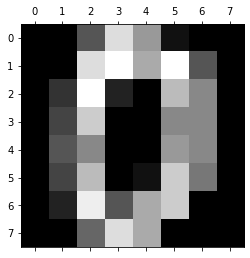

In [18]:
import matplotlib.pyplot as plt 
plt.matshow(digits.images[0]) 
plt.show()

In [19]:
X = digits.data
y = digits.target

In [20]:
print(X.shape, y.shape)

(1797, 64) (1797,)


In [21]:
A=np.dot(X,X.T)
print(A.shape)

(1797, 1797)


In [22]:
values, vectors = np.linalg.eig(np.sqrt(A))
values[:5]
print(values.shape)

(1797,)


In [23]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

0.9999999999999998 
 [0.8298325736820084, 0.02838753101693554, 0.02596526203796797, 0.022699658194926683, 0.01617372915581059, 0.010834340128454658, 0.008764847363960835, 0.007975617073340619, 0.006702174936296469, 0.006284250822298233, 0.004493512523589903, 0.00434065774711589, 0.0035930442744519487, 0.003313168319467957, 0.0028761790912303986, 0.00252695644713985, 0.002455632146802918, 0.0023036972328410446, 0.0018535635415163846, 0.0017761173045608913, 0.0016131340693859018, 0.0014626590658594941, 0.001408791931569151, 0.0013293406956602465, 0.0012708984532294075, 0.001083789469665145, 0.001014594108016187, 0.0009429322248775552, 0.0008644618172384941, 0.0007812791294473156, -0.000701930079376481, 0.0006707621196236192, 0.0006463379089265928, -0.0005475738221504404, 0.0005995418612318192, 0.000578959161487806, 0.0005333408484489875, 0.0005227601430284899, -0.00048139441833601574, -0.00048237894514586885, 0.0004582674958198289, -0.0003785051167933108, 0.0004020090382419935, 0.0003921

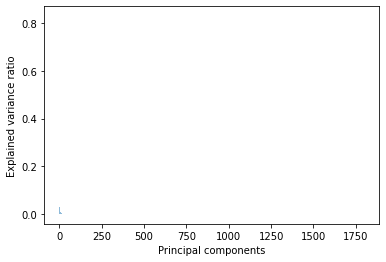

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

plt.bar(range(1797), explained_variances, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [26]:
sigma = np.zeros((1797, 2), int)
sigma[0,0]=np.sqrt(values[0])
sigma[1,1]=np.sqrt(values[1])
print(sigma)

[[303   0]
 [  0  56]
 [  0   0]
 ...
 [  0   0]
 [  0   0]
 [  0   0]]


In [27]:
X_new=np.dot(vectors,sigma)
print(X_new)

[[ 6.75178218  0.07736643]
 [ 7.42485498 -0.7044582 ]
 [ 7.44977175 -0.6416403 ]
 ...
 [ 8.07481387 -0.93135778]
 [ 7.64122453  0.40306828]
 [ 8.01167519  0.02660079]]


In [28]:
from scipy.linalg import svd
u,s,v= svd(X)
sigma=np.diag(s)
print(s.shape)
print(u.shape)
X_new=np.dot(u[:,:64],sigma[:,:2])
print(X_new)

(64,)
(1797, 1797)
[[45.86127719 -1.19211574]
 [55.52967927  7.86176977]
 [55.8278837   6.91459576]
 ...
 [65.52698526 10.65872857]
 [58.60616587 -4.9112521 ]
 [64.44823101 -0.45551347]]


#### b) Using inbuilt functions

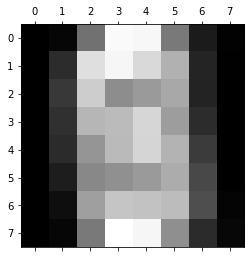

In [29]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)
image_reduced = svd.inverse_transform(X_reduced[0].reshape(1,-1))
image_reduced = image_reduced.reshape((8,8))
plt.matshow(image_reduced, cmap = 'gray')

### **Q2: IMDB Dataset**

In [33]:
import pandas as pd
df=pd.read_csv('/home/IMDB Dataset.csv')
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [34]:
corpus=list(df['review'][:1000])

In [35]:
print(corpus[:1])

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(corpus)
print(X.shape)

(1000, 17922)


In [37]:
import numpy as np

cooccurence_matrix=np.multiply(X.T,X)
cooccurence_matrix.setdiag(0)
print(cooccurence_matrix.shape)

(17922, 17922)


In [38]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
print(svd.fit_transform(cooccurence_matrix))

[[ 2.54976927e+01  2.65118099e+00  7.59290952e-02 ...  5.31582136e-02
   1.48102046e-01 -7.82463207e-01]
 [ 7.28511987e+01 -1.43250910e+01 -2.15972316e-01 ...  2.04837218e+00
   4.53892172e+00  2.09427917e+00]
 [ 7.63450166e+00 -5.38052423e-01  2.06824081e-02 ...  2.93814575e-01
  -3.43997096e-01 -1.79836287e+00]
 ...
 [ 4.75646139e+00  1.33778357e+00  4.79267822e-02 ...  4.46346954e-01
   5.72201488e-02  3.93626324e-01]
 [ 7.80357386e+00 -1.96821329e+00  1.00090219e-02 ...  1.22790292e+00
   8.02108262e-01 -5.70069594e-01]
 [ 3.98137395e+00  1.50996549e+00  1.72168436e-02 ... -7.54699359e-03
   2.87291229e-01 -6.29151076e-02]]


### **Q3: Implement LDA (step-by-step) on IRIS dataset.**

In [39]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
X=df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
y=df[["species"]].values
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
mean_vectors = []
for i in range(1, 4):
    mean_vectors.append(np.mean(X[y == i], axis = 0))
    print('Mean Vector class %s: %s\n' %(i, mean_vectors[i - 1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



In [41]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1)
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             
print('Within-class Scatter Matrix:\n', S_W)

Within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


In [42]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) 
    overall_mean = overall_mean.reshape(4,1) 
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('Between-class Scatter Matrix:\n', S_B)

Between-class Scatter Matrix:
 [[ 63.21213333 -19.534      165.16466667  71.36306667]
 [-19.534       10.9776     -56.0552     -22.4924    ]
 [165.16466667 -56.0552     436.64373333 186.90813333]
 [ 71.36306667 -22.4924     186.90813333  80.60413333]]


In [43]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.20490976]
 [ 0.38714331]
 [-0.54648218]
 [-0.71378517]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[-0.00898234]
 [-0.58899857]
 [ 0.25428655]
 [-0.76703217]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[-0.21215955]
 [-0.21105533]
 [-0.27514337]
 [ 0.76695507]]
Eigenvalue 3: 3.31e-15

Eigenvector 4: 
[[-0.21215955]
 [-0.21105533]
 [-0.27514337]
 [ 0.76695507]]
Eigenvalue 4: 3.31e-15


In [44]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Eigenvalues in decreasing order:

32.2719577997298
0.27756686384004753
6.935906860079298e-15
6.935906860079298e-15
Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [45]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.20490976 -0.00898234]
 [ 0.38714331 -0.58899857]
 [-0.54648218  0.25428655]
 [-0.71378517 -0.76703217]]


In [48]:
X_lda = X.dot(W)
print(X_lda)

[[ 1.49220928+0.j -1.9047102 +0.j]
 [ 1.25765567+0.j -1.60841445+0.j]
 [ 1.3487506 +0.j -1.74984635+0.j]
 [ 1.18024885+0.j -1.63919095+0.j]
 [ 1.51043263+0.j -1.96271183+0.j]
 [ 1.40183784+0.j -2.22012481+0.j]
 [ 1.27966155+0.j -1.91802239+0.j]
 [ 1.37835575+0.j -1.81948346+0.j]
 [ 1.11648646+0.j -1.54502342+0.j]
 [ 1.3131003 +0.j -1.56518244+0.j]
 [ 1.57646265+0.j -1.99977597+0.j]
 [ 1.28272558+0.j -1.79225834+0.j]
 [ 1.30854321+0.j -1.530813  +0.j]
 [ 1.37003298+0.j -1.60260779+0.j]
 [ 1.9385142 +0.j -2.25635444+0.j]
 [ 1.76617886+0.j -2.5681761 +0.j]
 [ 1.62043071+0.j -2.32183942+0.j]
 [ 1.42083076+0.j -1.98141342+0.j]
 [ 1.49597495+0.j -2.08721643+0.j]
 [ 1.48232553+0.j -2.13268434+0.j]
 [ 1.35102322+0.j -1.77221909+0.j]
 [ 1.37223268+0.j -2.1504877 +0.j]
 [ 1.6470616 +0.j -2.06083351+0.j]
 [ 1.03670041+0.j -1.94073418+0.j]
 [ 1.11878093+0.j -1.71597237+0.j]
 [ 1.16885021+0.j -1.55845538+0.j]
 [ 1.1809505 +0.j -1.94746124+0.j]
 [ 1.45805203+0.j -1.88017978+0.j]
 [ 1.47398592+0.j -1